## Data preparation

In [1]:
import numpy as np

labels = list()

with open('Cancerdata.txt') as f:
    lines = f.readlines()
    for i, line in enumerate(lines):
        if i == 0:
            continue
        line = line.split('\t')
        line = [item.rstrip() for item in line]
        line[0] = float(line[0].strip('"'))
        line[1:] = [float(x) for x in line[1:]]
        line = np.asarray(line)
        
        # Append labels
        labels.append(int(line[1]))
        
        # Create the data np.array with first observation
        # Vstack the rest of the observations to the newly created data matrix
        observation = line[2:]
        if i == 1:
            data = observation
        else:
            data = np.vstack((data, observation))
        
labels = np.asarray(labels)

print(np.shape(labels))
print(np.shape(data))

(82,)
(82, 2999)


## Step 1

### Dimension and feature selection techniques suited for unsupervised clustering tasks

1. Principal Component Analysis (PCA)
2. Independent Component Analysis (ICA)
3. Random Projections
4. Feature Selection based on Clustering Quality
5. Recursive Feature Elimination (RFE)

Principal Component Analysis (PCA): PCA is a technique that reduces the dimensionality of the data by identifying the most important features that capture the most variance in the data. PCA is a powerful technique for feature selection, as it can often reduce the number of features required for clustering while still retaining the important information.

Independent Component Analysis (ICA): ICA is a technique that separates the data into independent sources based on statistical properties. ICA can be used for feature selection by identifying the features that have the most independent information, which can help to remove redundant or noisy features.

Random Projections: Random projections is a technique that can be used to reduce the dimensionality of the data by projecting the data onto a lower-dimensional subspace. Random projections can be used for feature selection by identifying the most important dimensions that capture the most variance in the data.

Feature Selection based on Clustering Quality: This approach selects the features that produce the best clustering results. This method works by selecting a subset of features and evaluating the clustering performance with different clustering algorithms, and selecting the subset of features that results in the best clustering performance.

Recursive Feature Elimination (RFE): RFE is a feature selection method that selects features by recursively considering smaller and smaller subsets of features. RFE works by training a model on the full set of features, ranking the importance of the features, and then eliminating the least important feature. This process is repeated until a predetermined number of features is reached.

## PCA

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


data_pp = StandardScaler().fit_transform(data)
pca = PCA(svd_solver="auto").fit(data_pp)
# The PCA object offers convenient ways of accessing the
# principal directions and explained variance
pca.components_;
pca.explained_variance_;

# To get the principal components, the `transform` method of the
# PCA object can be used
principal_components_pca = pca.transform(data_pp)

2999


3036.024691358025


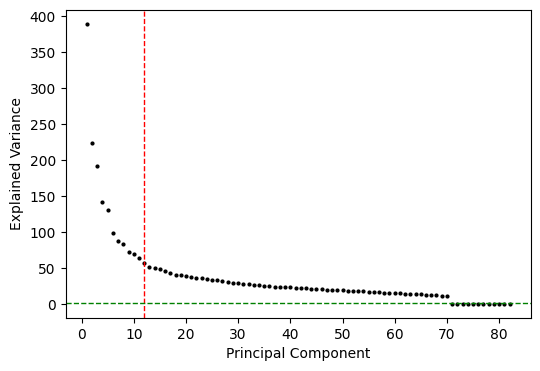

In [3]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6, 4))
ax = fig.gca()

ax.plot(np.arange(1, len(pca.components_) + 1), pca.explained_variance_, 'ok', markersize=2)
ax.axvline(12, linestyle="dashed", color="red", linewidth=1)
ax.axhline(1, linestyle="dashed", color="green", linewidth=1)

ax.set_xlabel("Principal Component")
ax.set_ylabel("Explained Variance");
print(pca.explained_variance_.sum())

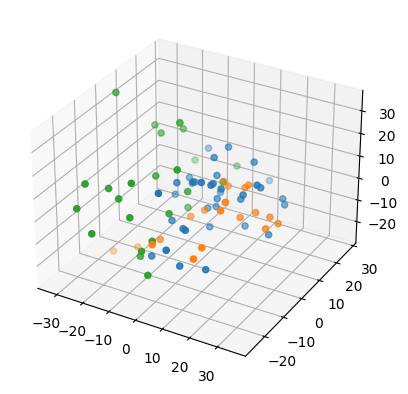

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

for i in range(0,3):
    ax.scatter(principal_components_pca[labels==i, 1], principal_components_pca[labels==i, 2],principal_components_pca[labels==i, 3], label=i )

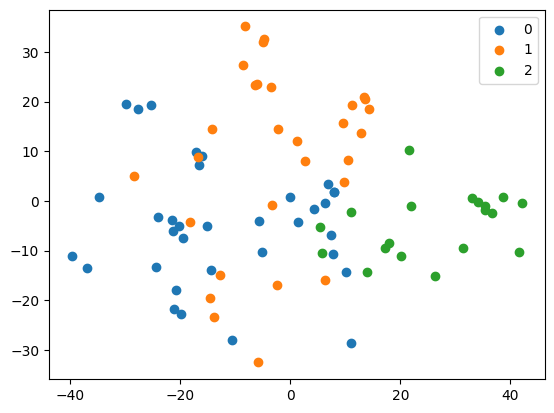

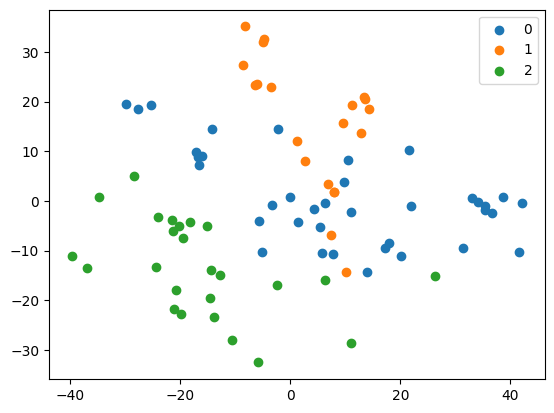

In [12]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, n_init="auto").fit(principal_components_pca)
#print(kmeans.cluster_centers_)
kmeans_label = kmeans.predict(principal_components_pca)

#Getting unique labels
 
u_labels = np.unique(kmeans_label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(principal_components_pca[kmeans_label == i , 0] , principal_components_pca[kmeans_label == i , 1] , label = i)
    
plt.legend()
plt.show()

for i in u_labels:
    plt.scatter(principal_components_pca[labels == i , 0] , principal_components_pca[labels == i , 1] , label = i)
    
    
plt.legend()
plt.show()

In [13]:
def pca(data, nr_components):
    pca = PCA(nr_components=nr_components).fit_transform(data)
    return pca

In [15]:
def kmeans_clustering(reduced_data, nr_clusters):
    kmeans = KMeans(init="k-means++", n_clusters=nr_clusters).fit(reduced_data)
    return kmean.labels_